In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
filename = "C:\\Users\\jakes\\x_train.txt"
S_in = np.loadtxt(filename, delimiter=',')
temp = S_in

filename = "C:\\Users\\jakes\\y_train.txt"
S_inY = np.loadtxt(filename, delimiter=',')
tempY = S_inY

In [3]:
filename = "C:\\Users\\jakes\\S_val.txt"
S_val = np.loadtxt(filename, delimiter=',')
tempV = S_val

filename = "C:\\Users\\jakes\\S_valY.txt"
S_valY = np.loadtxt(filename, delimiter=',')
tempVY = S_valY

# Normalizing

In [4]:
[N,dim]=np.shape(S_in)

S_in = temp
S_inY = tempY

S_val = tempV
S_valY = tempVY

for i in range(dim):
    mean = np.mean(S_in[:,i])
    S_in[:,i] = S_in[:,i] - mean
    
    std = np.std(S_in[:,i])
    S_in[:,i] = S_in[:,i] / std

    S_val[:,i] = S_val[:,i] - mean
    S_val[:,i] = S_val[:,i] / std

# SVM RBF Model 1 - 10e-2

## Eout : 51.5%
## SV estimate : 93.9%
## Number of SVs = 46941

### *Took extremely long to run 10e-2 and above*

In [5]:
clf=svm.SVC(kernel='rbf', C=10e-2)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

Eout         : 51.5 %
SV  estimate : 93.9 %
Number of support vectors: 46941


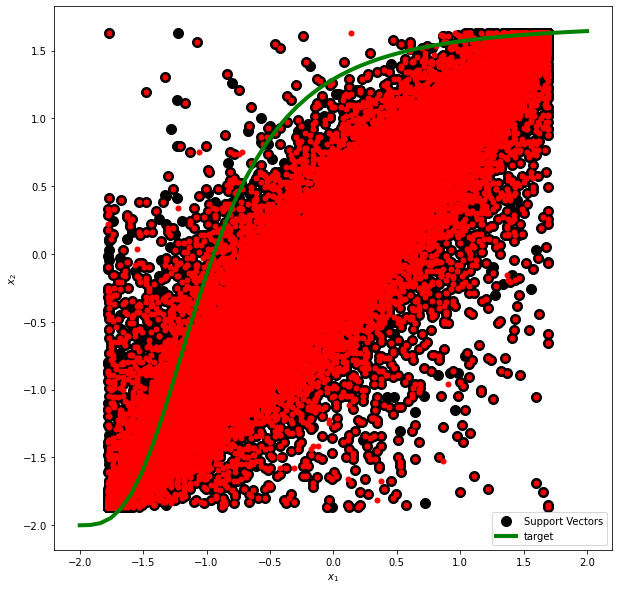

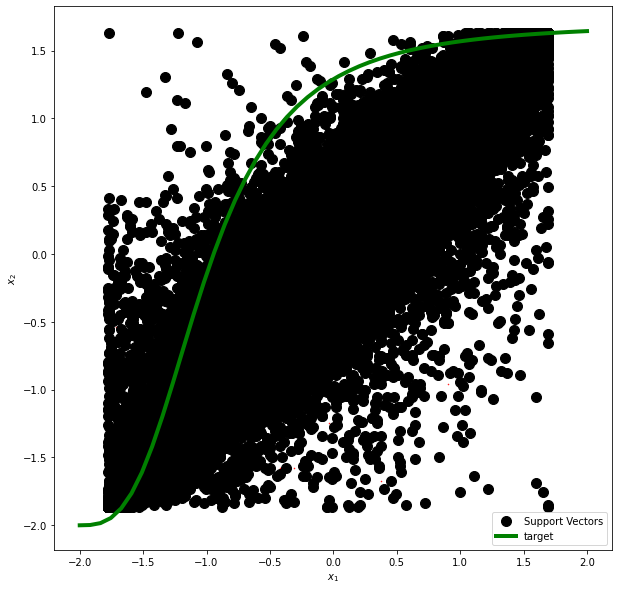

In [12]:
tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2


fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'.',color='m', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'.',color='gray', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(S_in[S_inY>0,0],S_in[S_inY>0,1],'o', color='r', markersize=5)
ax2.plot(S_in[S_inY<0,0],S_in[S_inY<0,1],'o',color='b', markersize=5)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'r.', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'b.', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

# Model 2 - 10e-7
## Eout         : 68.5 %
## SV  estimate : 100.0 %
## Number of support vectors: 50000

## Testing much lower values

Eout         : 68.5 %
SV  estimate : 100.0 %
Number of support vectors: 50000


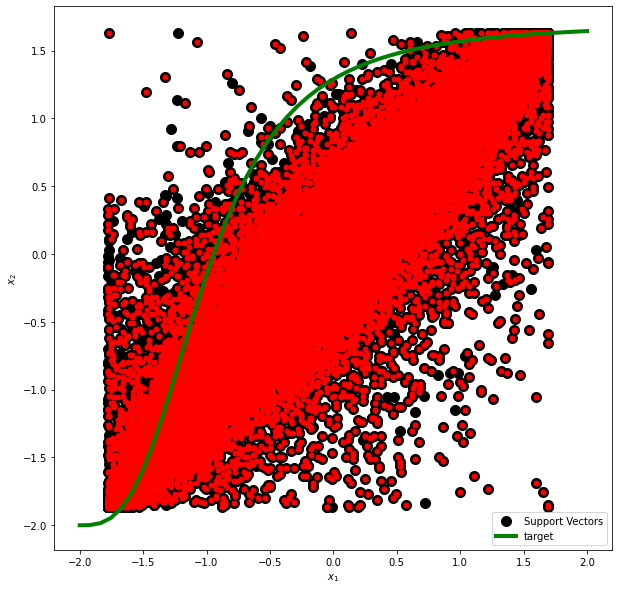

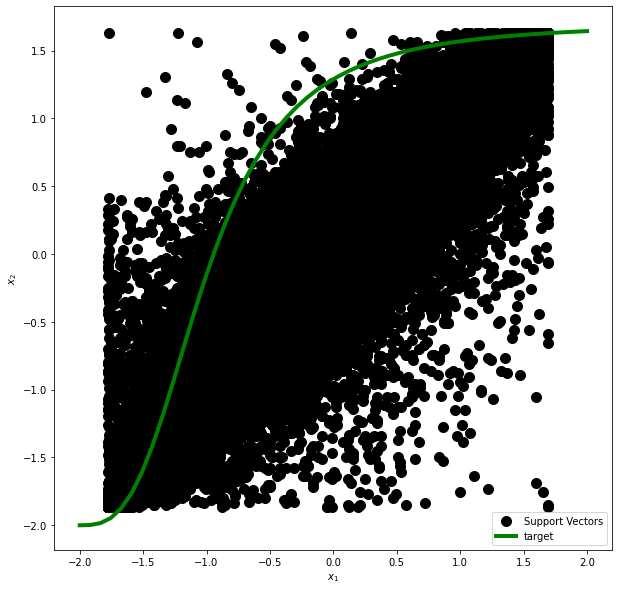

In [5]:
clf=svm.SVC(kernel='rbf', C=10e-7)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2


fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'.',color='m', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'.',color='gray', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(S_in[S_inY>0,0],S_in[S_inY>0,1],'o', color='r', markersize=5)
ax2.plot(S_in[S_inY<0,0],S_in[S_inY<0,1],'o',color='b', markersize=5)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'r.', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'b.', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

# Model 3 - 10e-10
## Eout         : 68.5 %
## SV  estimate : 100.0 %
## Number of support vectors: 50000

### *same as above?*

Eout         : 68.5 %
SV  estimate : 100.0 %
Number of support vectors: 50000


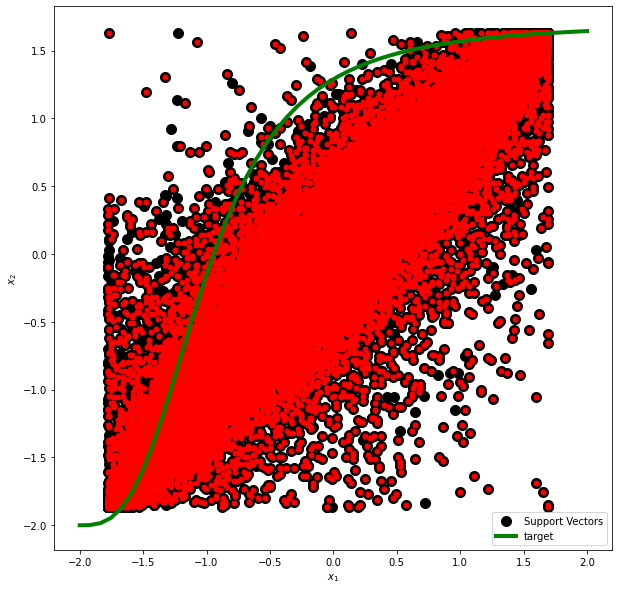

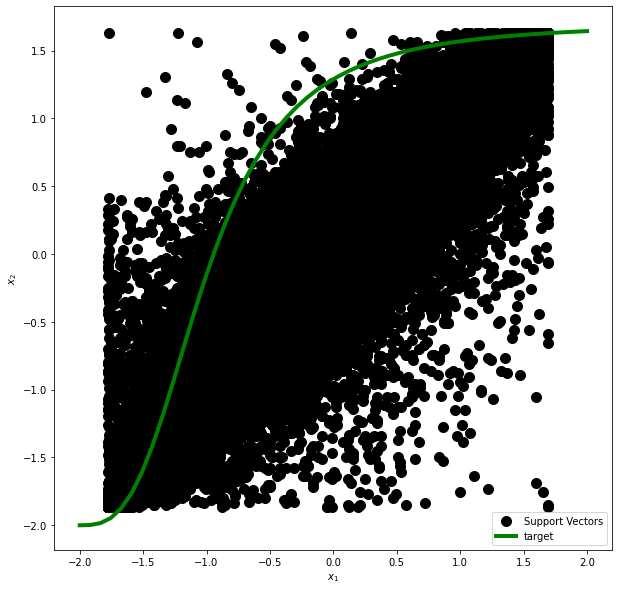

In [6]:
clf=svm.SVC(kernel='rbf', C=10e-10)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2


fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'.',color='m', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'.',color='gray', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(S_in[S_inY>0,0],S_in[S_inY>0,1],'o', color='r', markersize=5)
ax2.plot(S_in[S_inY<0,0],S_in[S_inY<0,1],'o',color='b', markersize=5)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'r.', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'b.', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

# Model 4 - 10e-5
## Eout         : 68.5 %
## SV  estimate : 100.0 %
## Number of support vectors: 50000

Eout         : 68.5 %
SV  estimate : 100.0 %
Number of support vectors: 50000


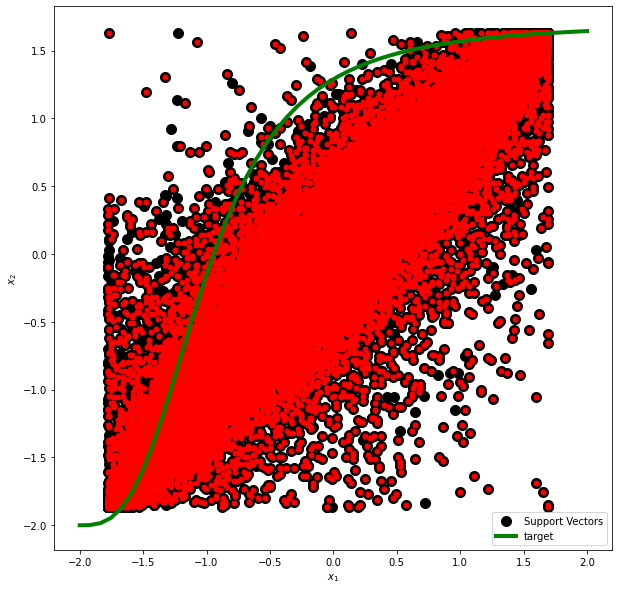

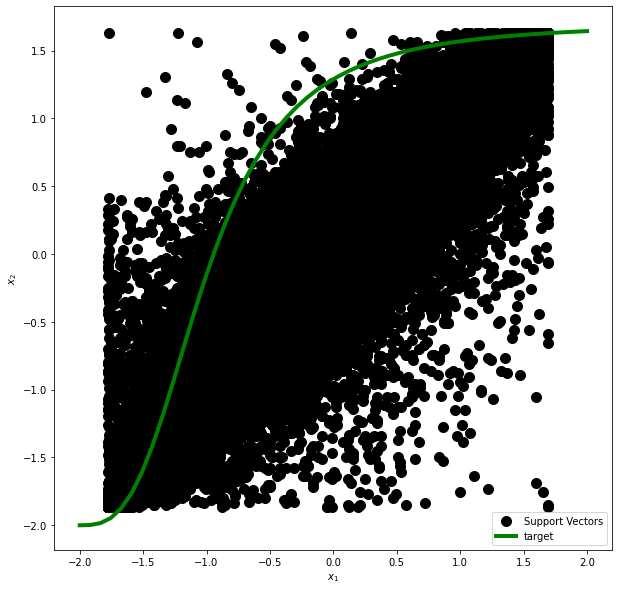

In [8]:
clf=svm.SVC(kernel='rbf', C=10e-5)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2


fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'.',color='m', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'.',color='gray', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(S_in[S_inY>0,0],S_in[S_inY>0,1],'o', color='r', markersize=5)
ax2.plot(S_in[S_inY<0,0],S_in[S_inY<0,1],'o',color='b', markersize=5)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'r.', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'b.', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

# Model 5 - 10e-3
## Eout         : 64.1 %
## SV  estimate : 98.9 %
## Number of support vectors: 49449

Eout         : 64.1 %
SV  estimate : 98.9 %
Number of support vectors: 49449


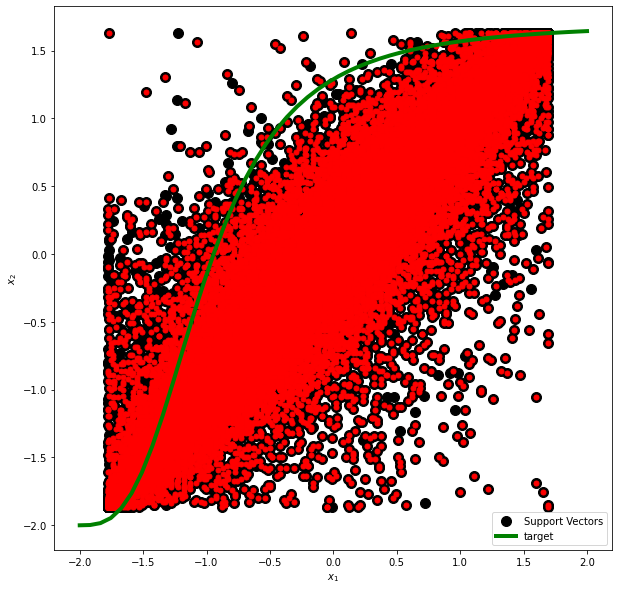

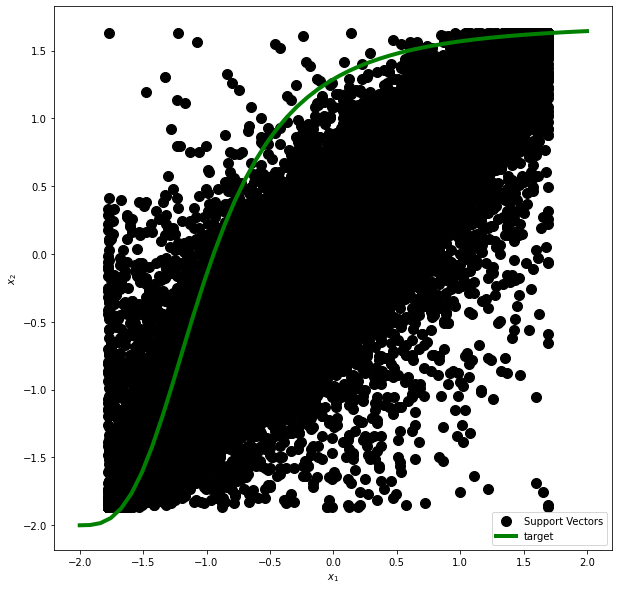

In [9]:
clf=svm.SVC(kernel='rbf', C=10e-3)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2


fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'.',color='m', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'.',color='gray', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(S_in[S_inY>0,0],S_in[S_inY>0,1],'o', color='r', markersize=5)
ax2.plot(S_in[S_inY<0,0],S_in[S_inY<0,1],'o',color='b', markersize=5)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

fig2, ax2=plt.subplots(figsize=(10,10))
ax2.plot(S_val[gtest>0,0],S_val[gtest>0,1],'r.', markersize=1)
ax2.plot(S_val[gtest<0,0],S_val[gtest<0,1],'b.', markersize=1)
ax2.plot(sv[:,0], sv[:,1], 'ko', label="Support Vectors", markersize=10)
ax2.plot(tt,Ytt,'g',label="target", linewidth=4)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.legend()

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)